tensor([[0, 0, 4, 5, 0, 0, 0, 0, 0, 0],
        [0, 0, 5, 1, 0, 0, 0, 0, 4, 0],
        [0, 0, 0, 0, 0, 0, 0, 4, 1, 0],
        [0, 0, 1, 0, 5, 3, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 5, 5, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [3, 0, 0, 0, 0, 0, 0, 0, 0, 3],
        [5, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 5, 4, 0, 0, 1, 0]], dtype=torch.int32)


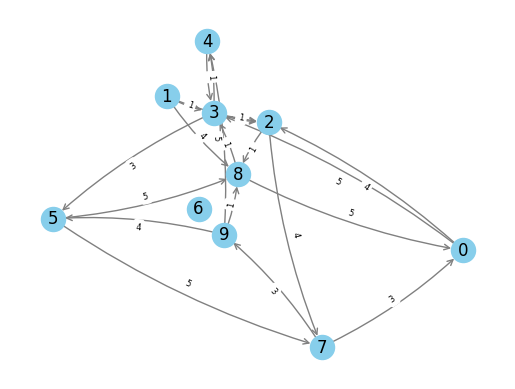

In [13]:
import torch
from random import randint

torch.manual_seed(0)
n = 10
p = 0.2
g = (torch.rand(n, n) < p).int()
g.fill_diagonal_(0)   # remove self-loops (set diagonal to 0)

for i in range(n):
    for j in range(n):
        if g[i][j] == 1:
            g[i][j] = randint(1, 5)  # assign random weights between 1 and 10
print(g)

import networkx as nx
import matplotlib.pyplot as plt

# assuming g is a torch int/bool adjacency matrix on CPU
# e.g. g = (torch.rand(n,n) < p).int()
A = g.cpu().numpy()        # convert to numpy
G = nx.DiGraph(A) # undirected; use create_using=nx.DiGraph() for directed

pos = nx.kamada_kawai_layout(G)  # layout (try nx.kamada_kawai_layout, nx.circular_layout, ...)
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="skyblue")
nx.draw_networkx_labels(G, pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edges(
    G, pos,
    arrowstyle="->",
    arrowsize=10,
    edge_color="gray",
    connectionstyle="arc3,rad=0.08",  # slight curve so arrows are visible
    arrows=True
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)
plt.axis("off")
plt.show()




In [16]:
Q = set(range(n))
# randomly picking S and G

S = randint(0,n-1)
G = randint(0,n-1)
while G == S:
    G = randint(0,n-1)
# manually set S and G for consistent testing
S = 7
G = 3
print(Q, S, G)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9} 7 3


In [17]:
# in here, we are going to implement a Dijkstra's algorithm
# to facilitate the implemenation, we use the heapq library to mange min-priority queue
import heapq

def successor(u):
    succ = set()
    for v in Q:
        if g[u][v] > 0:
            succ.add((v,g[u][v].item())) #(neighbor, edge cost)
    return succ

pq = []  # (distance, node)
heapq.heappush(pq, (0, S))
dist = {node: float('inf') for node in Q}
dist[S] = 0
visited = set()

predecessor = dict()
predecessor[S] = None

while pq:
    current_dist, node = heapq.heappop(pq)
    visited.add(node)
    # If this entry is outdated, skip it
    if current_dist > dist[node]:
        continue

    for neighbor, weight in successor(node):
        new_dist = current_dist + weight
        if new_dist < dist[neighbor]:
            dist[neighbor] = new_dist
            predecessor[neighbor] = node
            heapq.heappush(pq, (new_dist, neighbor))  # push new pair

if G in visited:
    print(f"Goal node {G} found!")
    path = []
    node = G
    while node is not None:
        path.append(node)
        node = predecessor[node]
    path.reverse()
    print("Path:", path)
    print("Total cost:", dist[G])
else:
    print(f"Goal node {G} not found in the graph.")

Goal node 3 found!
Path: [7, 9, 8, 3]
Total cost: 5
